In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd 

In [64]:
seattle = pd.read_csv("seattle_01.csv", index_col = "Unnamed: 0")
seattle.head()

,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,2018-12-20 04:08:45.277643,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,2018-12-20 03:04:19.861014,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite,USD,nightly
3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49,2018-12-20 04:11:25.482975,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",USD,nightly
4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,2018-12-20 03:12:38.391711,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",USD,nightly


In [70]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 1517
Data columns (total 17 columns):
room_id                 7576 non-null int64
host_id                 7576 non-null int64
room_type               7576 non-null category
address                 7576 non-null object
reviews                 7576 non-null int64
overall_satisfaction    6103 non-null float64
accommodates            7576 non-null int64
bedrooms                7576 non-null float64
bathrooms               7574 non-null float64
price                   7576 non-null int64
last_modified           7576 non-null object
latitude                7576 non-null float64
longitude               7576 non-null float64
location                7576 non-null object
name                    7576 non-null object
currency                7576 non-null category
rate_type               7576 non-null category
dtypes: category(3), float64(5), int64(5), object(4)
memory usage: 910.3+ KB


In [31]:
seattle["location"].nunique()

7317

In [30]:
seattle["location"].value_counts()

0101000020E6100000A1866F61DD955EC01E17D522A2D04740    38
0101000020E610000029417FA147955EC0C619C39CA0CF4740    32
0101000020E610000021020EA14A945EC0A950DD5CFCCF4740    15
0101000020E610000052465C001A955EC0E9279CDD5ACE4740    11
0101000020E610000062A3ACDF4C955EC0CCD3B9A294CE4740    10
0101000020E610000069E21DE049945EC0AE0D15E3FCCF4740    10
0101000020E61000007C8159A148965EC0F6083543AACE4740     8
0101000020E6100000E754320054965EC07A8A1C226ECE4740     8
0101000020E6100000D0D03FC1C5965EC06C3F19E3C3C44740     8
0101000020E6100000505260014C955EC0C616821C94CE4740     8
0101000020E61000004DF8A57EDE8A5EC0698B6B7C26D74740     7
0101000020E6100000868DB27E33965EC0D158FB3BDBD34740     6
0101000020E610000083C30B2252955EC0DFC4909C4CD64740     5
0101000020E6100000368FC360FE935EC039B69E211CCF4740     5
0101000020E610000051137D3ECA8D5EC063D009A183C84740     5
0101000020E61000000742B28009945EC020B41EBE4CCE4740     4
0101000020E61000002D41464085925EC022DE3AFF76C54740     4
0101000020E610000029ED0DBE30935

In [39]:
seattle.columns

Index(['room_id', 'host_id', 'room_type', 'address', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms',
       'price', 'last_modified', 'latitude', 'longitude', 'location', 'name',
       'currency', 'rate_type'],
      dtype='object')

In [68]:
seattle.sort_values("room_type", ascending = True, inplace = True)
seattle.head()

,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
4951,22152321,8534462,Entire home/apt,"Seattle, WA, United States",0,NaN,3,1.0,1.0,70,2018-12-20 04:01:50.841972,47.602577,-122.337085,0101000020E610000038BEF6CC92955EC030293E3E21CD...,Pike's Place. 98 Walkscore 1BD 9 F,USD,nightly
4950,22151580,8534462,Entire home/apt,"Seattle, WA, United States",0,NaN,3,1.0,1.0,70,2018-12-20 03:49:35.052803,47.610762,-122.341511,0101000020E61000005A0EF450DB955EC0DDD1FF722DCE...,Ultra-Modern 1Bed 3 F,USD,nightly
4949,22151550,8534462,Entire home/apt,"Seattle, WA, United States",0,NaN,5,2.0,2.0,100,2018-12-20 03:26:20.481574,47.617650,-122.348809,0101000020E61000003BE3FBE252965EC0EC2FBB270FCF...,Space Needle Condos 2BR/2BA 3 F,USD,nightly
4948,22151541,8534462,Entire home/apt,"Seattle, WA, United States",0,NaN,5,2.0,2.0,100,2018-12-20 03:26:19.120455,47.617829,-122.349136,0101000020E6100000CD76853E58965EC09CC24A0515CF...,Space Needle Condos 2BR/2BA 2 F,USD,nightly


In [69]:
seattle["room_type"] = seattle["room_type"].astype("category")
seattle["rate_type"] = seattle["rate_type"].astype("category")
seattle["currency"] = seattle["currency"].astype("category")

In [44]:
df1 = pd.read_csv("seattle_01.csv")
df1.shape

(7576, 18)

In [45]:
plotPerColumnDistribution(seattle,10, 5)

NameError: name 'plotPerColumnDistribution' is not defined

In [46]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

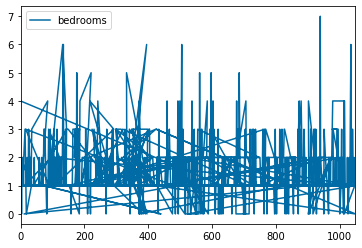

In [51]:
plt.style.use("tableau-colorblind10")
seattle.plot(y = ["room_typs", "bedrooms"])

In [87]:
# Distribution graphs (histogram/bar graph) of column data 列数据的分布图（直方图/条形图）

def plotPerColumnDistribution(seattle, nGraphShown, nGraphPerRow):
    nunique = seattle.nunique()
    seattle = seattle[[col for col in seattle if nunique[col] > 1 and nunique[col] < 50]]
    #为了显示，选择具有1到50个唯一值的列
    nRow, nCol = seattle.shape
    columnNames = list(seattle)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = "w", edgecolor = "k")
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = seattle.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel("counts")
        plt.xticks(rotation = 90)
        plt.title(f"{columnNames[i]} (column {i})")
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [52]:
seattle.shape

(1000, 17)

In [86]:
seattle.nunique()

room_id                 7576
host_id                 4382
room_type                  3
address                   27
reviews                  347
overall_satisfaction       6
accommodates              20
bedrooms                   9
bathrooms                 13
price                    351
last_modified           7576
latitude                7094
longitude               7092
location                7317
name                    7376
currency                   1
rate_type                  1
dtype: int64

In [65]:
# Correlation matrix 相关矩阵
def plotCorrelationMatrix(seattle, graphWidth):
    filename = seattle.dataframeName
    seattle = seattle.dropna('columns') # drop columns with NaN
    seattle = seattle[[col for col in seattle if seattle[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if seattle.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({seattle.shape[1]}) is less than 2')
        return
    corr = seattle.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [74]:
# 散点图和密度图
def plotScatterMatrix(seattle, plotSize, textSize):
    seattle = seattle.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular 仅保留数字列。删除将导致df奇异的行和列
    seattle = seattle.dropna('columns')
    seattle = seattle[[col for col in seattle if seattle[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots减少内核密度图的矩阵求逆的列数
        columnNames = columnNames[:10]
    seattle = seattle[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = seattle.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [77]:
#check 
nRowsRead = 1000
df1 = pd.read_csv("seattle_01.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'seattle_01.csv'
nRow, nCol = df1.shape
nRow, nCol

(1000, 18)

In [90]:
df1.head()

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,2018-12-20 04:08:45.277643,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,2018-12-20 03:04:19.861014,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite,USD,nightly
3,3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49,2018-12-20 04:11:25.482975,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",USD,nightly
4,4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,2018-12-20 03:12:38.391711,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",USD,nightly


//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 22270 missing from current font.
  font.se

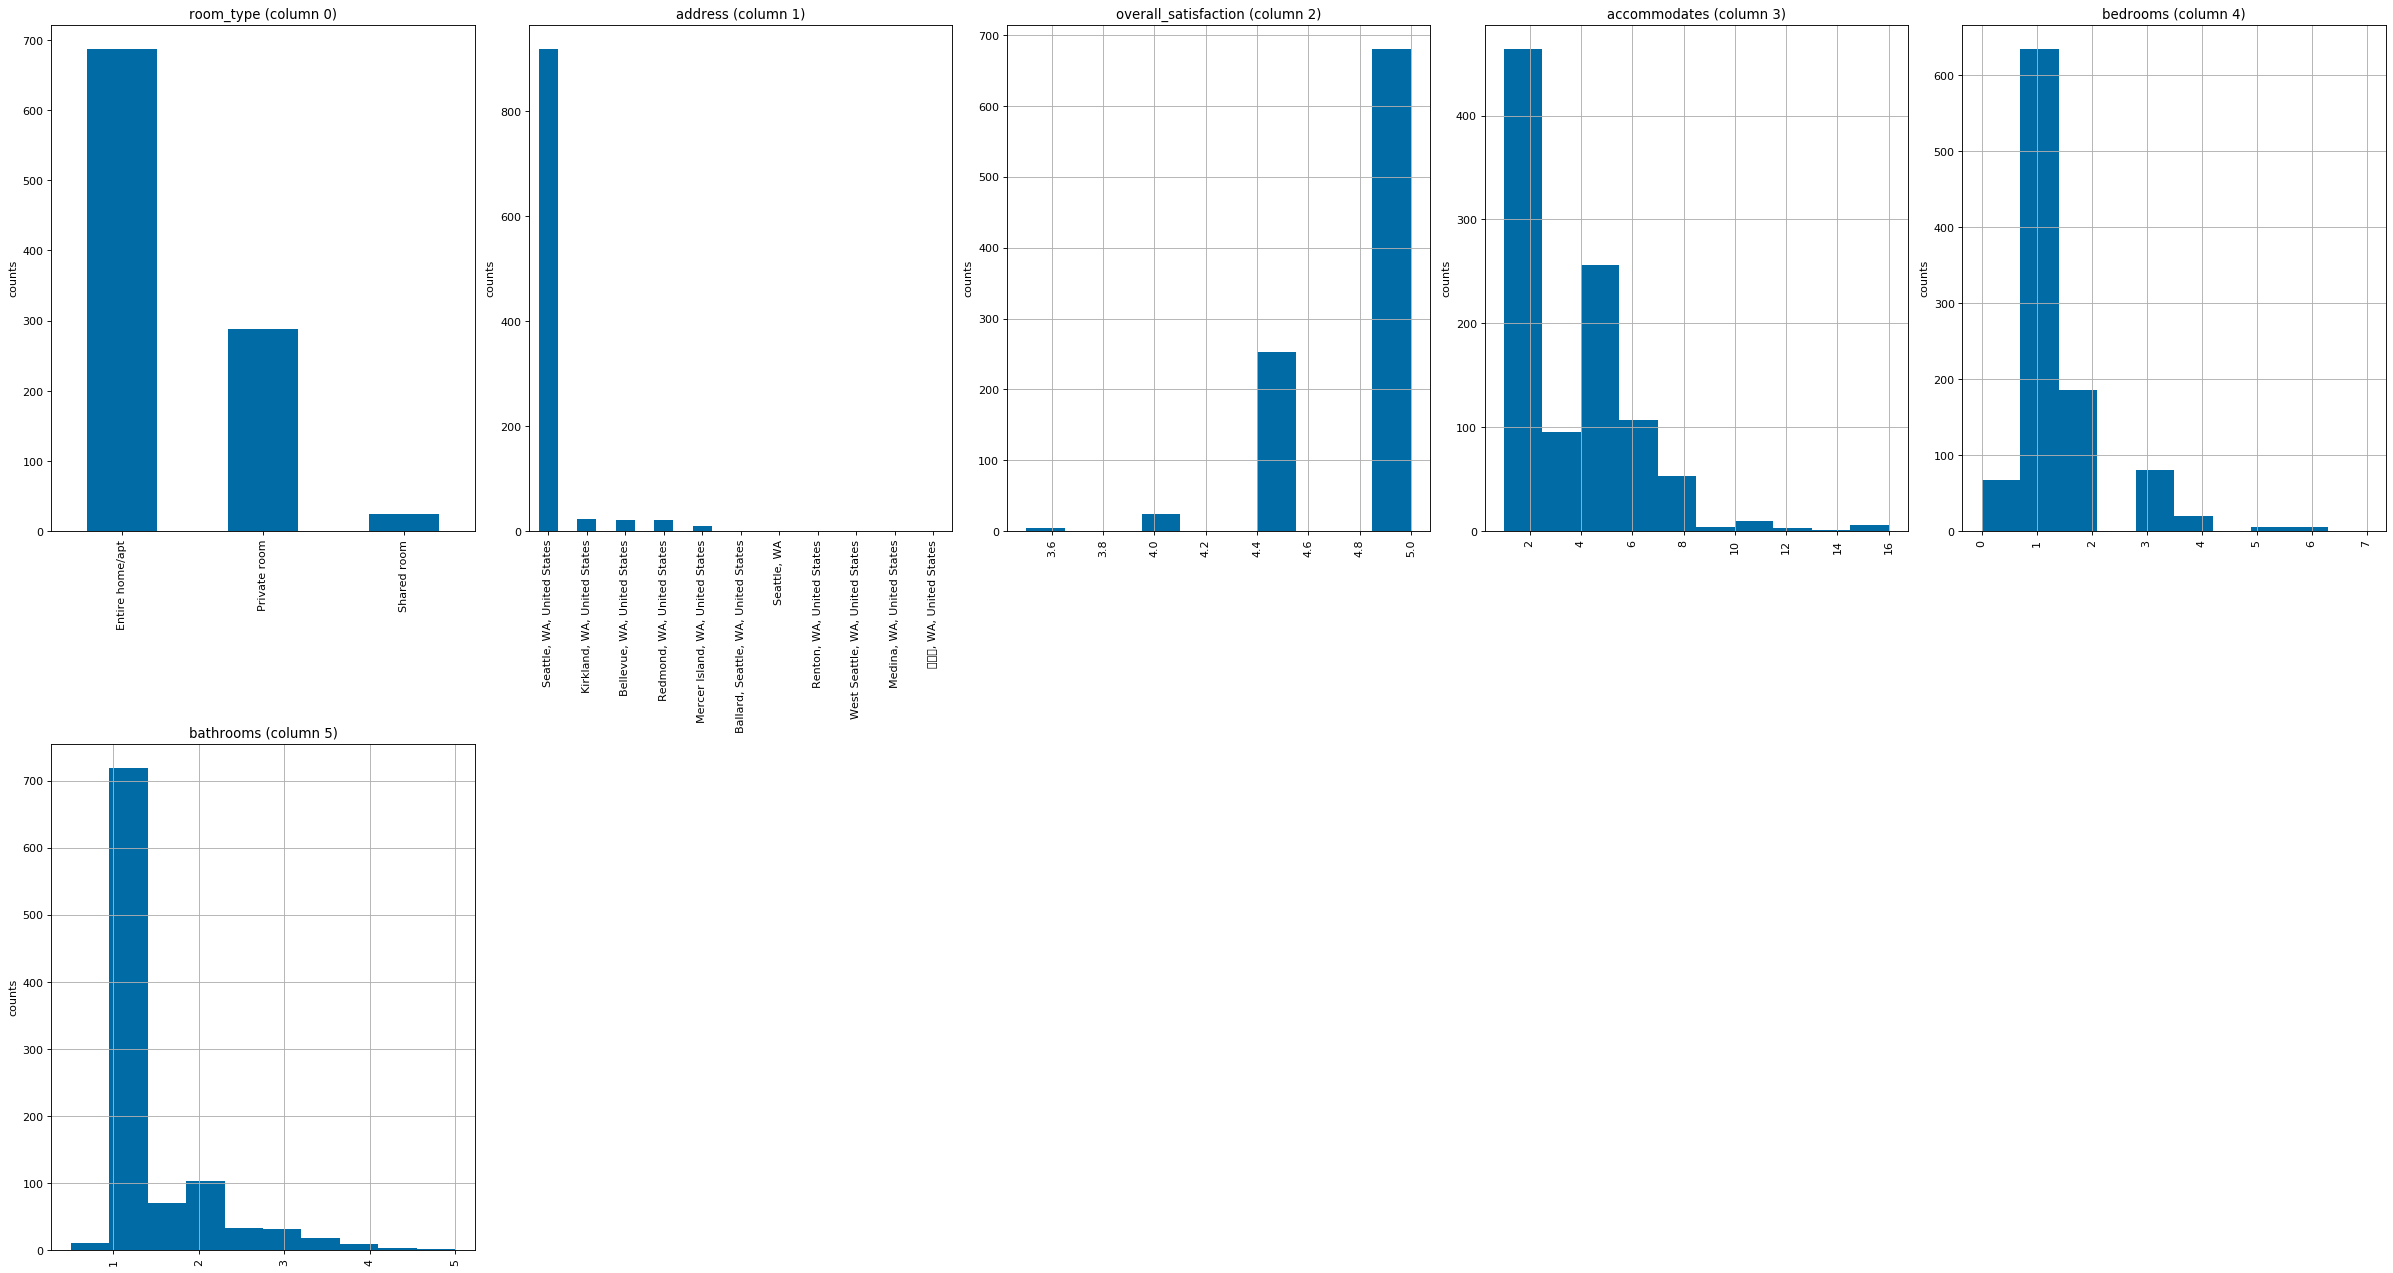

In [88]:
plotPerColumnDistribution(df1, 10, 5)

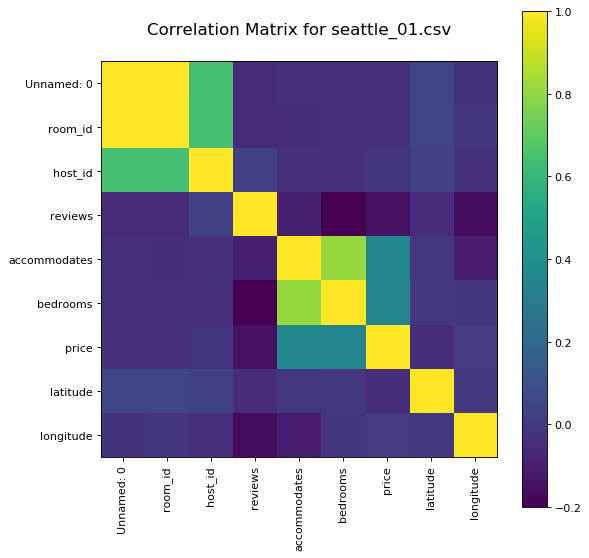

In [93]:
plotCorrelationMatrix(df1, 8)

In [92]:
plotScatterMatrix(df1, 20, 10)

NameError: name 'df' is not defined